In [1]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import pandas as pd
from datetime import datetime
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns

In [2]:
# Import models
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.feature_bagging import FeatureBagging

In [3]:
# reading the dataset
df = pd.read_csv("public/data_source/rca_2020_04_22.csv")
actualDataframe = pd.read_csv("public/data_source/ret_info.csv")

In [ ]:
def generateActual(actualDF):
    nwe_actdf = actualDF.assign(timestamp = list(map( lambda x: datetime.timestamp(datetime.strptime(x,'%Y-%m-%d %H:%M:%S+08:00')), actualDF['time_preliminary'] )))
    return nwe_actdf

In [11]:
def getMetricsConfusionMatrix(actual, predicted):
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()
    del confusion_matrix, cm_display    

In [ ]:
def getConfusionMatrix(actual, predicted):
    
    return

In [6]:
le = preprocessing.LabelEncoder()
le.fit(df['source'])
LabelEncoder()
list(le.classes_)
sourceTransformed = le.transform(df['source'])

In [7]:
X1 = df['latency'].values.reshape(-1,1)
X2 = sourceTransformed.reshape(-1,1)

X = np.concatenate((X1,X2), axis=1)

In [8]:
outliers_fraction = 0.1
# Test 4 different methods
classifiers = {
        'FeatureBagging': FeatureBagging(contamination=outliers_fraction),
        'KNN': KNN(contamination=outliers_fraction),
        'HBOS': HBOS(contamination=outliers_fraction),
        'IForest': IForest(contamination=outliers_fraction)
}



OUTLIERS :  292 INLIERS :  2708 FeatureBagging
                trace_id      timestamp  latency  succ      source      target
3   5b93517183b7e8235950  1587484800099       46  True  docker_001  docker_008
14  5b93517183b7e8235950  1587484800265        7  True  docker_007  docker_007
21  5b93517183b7e8235950  1587484800347        8  True  docker_008  docker_008
42  5b93517183b7e8235950  1587484800443        3  True  docker_001  docker_001
55  5b93517183b7e8235950  1587484800070     2472  True      os_022  docker_001


<Figure size 720x720 with 0 Axes>

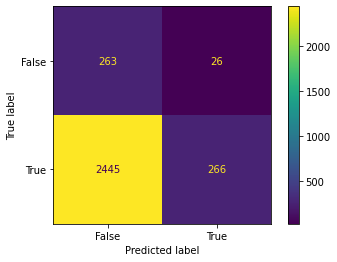



OUTLIERS :  165 INLIERS :  2835 KNN
                trace_id      timestamp  latency  succ      source      target
3   5b93517183b7e8235950  1587484800099       46  True  docker_001  docker_008
21  5b93517183b7e8235950  1587484800347        8  True  docker_008  docker_008
22  5b93517183b7e8235950  1587484800341       58  True  docker_001  docker_008
40  5b93517183b7e8235950  1587484800382       61  True  docker_001  docker_001
53  5b93517183b7e8235950  1587484800462       77  True  docker_001  docker_001


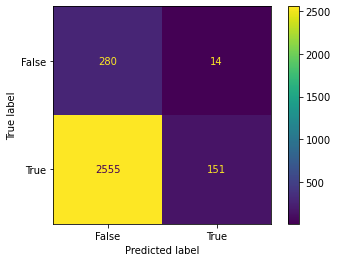



OUTLIERS :  0 INLIERS :  3000 HBOS
Empty DataFrame
Columns: [trace_id, timestamp, latency, succ, source, target]
Index: []


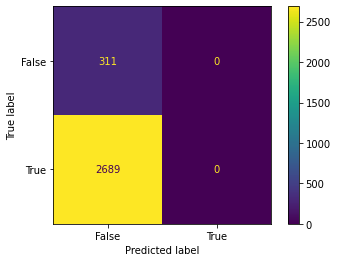



OUTLIERS :  300 INLIERS :  2700 IForest
                trace_id      timestamp  latency  succ      source      target
3   5b93517183b7e8235950  1587484800099       46  True  docker_001  docker_008
14  5b93517183b7e8235950  1587484800265        7  True  docker_007  docker_007
17  5b93517183b7e8235950  1587484800255       27  True  docker_001  docker_007
21  5b93517183b7e8235950  1587484800347        8  True  docker_008  docker_008
22  5b93517183b7e8235950  1587484800341       58  True  docker_001  docker_008


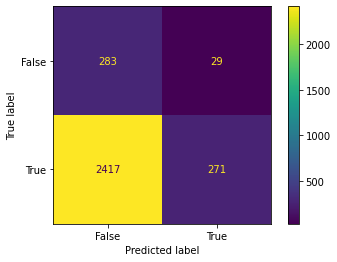

In [14]:
xx, yy = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))
plt.figure(figsize=(10, 10))

for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X)
    # predict raw anomaly score
    scores_pred = clf.decision_function(X) * -1

    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X)

    np.unique(y_pred, return_counts=True)

    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)

    print('\n\nOUTLIERS : ', n_outliers, 'INLIERS : ', n_inliers, clf_name)

    outliers = []
    for index in range(len(y_pred)):        
        if y_pred[index] == 1:
            outliers.append(index)

    outliersList = df.iloc[outliers, :]
    print(outliersList.head(5))
    #print(y_pred)
    
    actual = np.random.binomial(1,.9,size = y_pred.size)
    #actual = generateActual(actualDataframe)
    getConfusionMatrix(actual, y_pred)

    #pd.DataFrame(outliersList).to_csv("public/results/"+clf_name+"_preresult.csv")



    # threshold value to consider a datapoint inlier or outlier - the probability that the prediction is true
#    threshold = stats.scoreatpercentile(scores_pred, 100 * outliers_fraction)

    # decision function calculates the raw anomaly score for every point
#    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
#    Z = Z.reshape(xx.shape)

    # plot outliers and contour
#    subplot = plt .subplot(2, 2, i + 1)
#    subplot.contour(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 15))
#    subplot.contour(xx, yy, Z, levels=[threshold], linewidths=2, colors='red')

    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
#    subplot.contour(xx, yy, Z, levels=[threshold, Z.max()], colors='blue')

    # scatter plot of inliers with white dots
#    subplot.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1],c='white', s=12, edgecolor='g')
    # scatter plot of outliers with black dots
#    subplot.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1],c='black', s=12, edgecolor='g')
#    subplot.axis('tight')

#    subplot.set_title(clf_name)
#    subplot.set_xlim((-15, 15))
#    subplot.set_ylim((-15, 15))

#plt.show()

